In [24]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Question

Are the increased amount of layoffs in the video games industry due to a decrease in players?

## Purpose
I've been a fan of video games for as long as I can remember and I've always kept up with news in the industry. Over the course of the year I noticed that more and more negative news about the industry was circulating, such as many well known studios suddenly suffering layoffs. I wanted to do my own research to see if I could find at least part of the source for this event.

## Starting Point
As stated earlier, I follow news about the industry pretty closely. I specifically learned about the unprecedented amount of layoffs this year through a news show that I watch every week and this lead me to the question I decided to research.

## Plan
In order to determine this, I will look at five companies that have suffered layoffs in 2023. I will look at the player counts for these five companies' major games over the last four or five years. I will then see if the player counts for those games have increased or decreased over those years and determine the exact amount increased or decreased. Then I will determine if that data has any relevancy to the layoffs in 2023.

## Data Collection Pt. 1
To start off, I looked at what game development companies suffered layoffs in 2023. I then chose five well known developers from that list to look into further. The five companies I decided to research were Bungie, EA, 343 Industries, Amazon Games, Riot Games, CD Projekt Red, and Ubisoft. These are all some of the largest and most successful game developers yet they all suffered layoffs in 2023.

## Sources
EA Layoffs: https://variety.com/2023/digital/news/electronic-arts-layoffs-employees-1235568329/?sub_action=logged_in

Bungie Layoffs: https://www.bloomberg.com/news/articles/2023-10-31/sony-s-bungie-game-unit-cut-jobs-as-destiny-2-popularity-waned#xj4y7vzkg

Amazon Layoffs: https://www.cnbc.com/2023/04/04/amazon-lays-off-some-employees-in-its-video-games-unit-read-the-memo.html 

343 Studios Layoffs: https://www.gamesindustry.biz/343-layoffs-affected-95-including-top-directors 

Riot Games Layoffs: https://www.gamesindustry.biz/riot-games-lays-off-46-staff-as-part-of-strategic-shifts#:~:text=Valorant%20and%20League%20of%20Legends,in%20the%20past%20few%20weeks 

Ubisoft Layoffs: https://www.ign.com/articles/ubisoft-lays-off-124-employees-to-enhance-collective-efficiency

CD Projekt Red Layoffs: https://www.ign.com/articles/mass-layoffs-at-cyberpunk-2077-developer-cd-projekt-prompt-new-union-formation

In [25]:
layoffs_df = pd.DataFrame({'Studio': ['Bungie', 'EA', '343 Industries', 'Amazon Games', 'Riot Games', 'CD Projekt Red', 'Ubisoft'],
                   'Layoffs': [100, 800, 95, 100, 46, 100, 124]})
layoffs_df

,Studio,Layoffs
0,Bungie,100
1,EA,800
2,343 Industries,95
3,Amazon Games,100
4,Riot Games,46
5,CD Projekt Red,100
6,Ubisoft,124


## Data Collection Pt. 2
Next I needed data on the player count for these companies flagship titles. For every developer except for Riot Games, I was able to use steam charts to measure the player counts since the release of the measured games. For Riot Games I used a third party player tracker that I linked below, so if any of the data is unreliable it would be the player count for League of Legends. For Bungie, I looked at the player count for Destiny 2, for EA I looked at the player count for FIFA, for 343 Industries I looked at the player count for Halo Infinite, for Amazon games I looked at the player count for New World, for Riot Games I looked at the player count for League of Legends, for CD Projekt Red I looked at Cyberpunk 2077, and for Ubisoft I looked at Rainbow Six Siege. 
These are all the flagship titles for these companies that have garnered the most players over the years. Amazon Games' New World released in 2021 along with 343 Industry's Halo Infinite, so I looked at the peak player count for each game in 2021 and 2023. I then found the difference between those two player counts. 

## Player Count Calculations
Destiny 2 / 2021: 187,504 / 2023: 316,651 / Difference: +129,147

FIFA / FIFA 2021: 43,733 / FIFA 2023: 110,757 / Difference: +67,024

Halo Infinite / 2021: 147,782 / 2023: 18,003 / Difference: -129,779

New World / 2021: 913,027 / 2023: 77,642 / Difference: -835,385

League of Legends / 2021: 13,948,310 / 2023: 10,233,639 / Difference: -3,714,671

Cyberpunk 2077 / 2021: 47,115 / 2023: 273,990 / Difference: 226,875

Rainbow Six Siege / 2021: 199,830 / 2023: 95,149 / Difference: -104,681


## Sources

https://steamcharts.com/app/1085660 - Destiny 2 Players (Bungie)

https://steamcharts.com/app/1313860 - FIFA 21 Count (EA)

https://steamcharts.com/app/1811260 - FIFA 23 Count (EA)

https://steamcharts.com/app/1240440 - Halo Infinite Count (343)

https://steamcharts.com/app/1063730 - New World Count (Amazon)

https://activeplayer.io/league-of-legends/ - League of Legends (Riot)

https://steamcharts.com/app/1091500 - Cyberpunk 2077 (CD Projekt Red)

https://steamcharts.com/app/359550#All - Rainbow Six Siege (Ubisoft)

In [26]:
playercount_df = pd.DataFrame({'Studio': ['Bungie', 'EA', '343 Industries', 'Amazon Games', 'Riot Games', 'CD Projekt Red', 'Ubisoft'],
                               'Game': ['Destiny 2', 'FIFA 21-23', 'Halo Infinite', 'New World', 'League of Legends', 'Cyberpunk 2077', 'Rainbow Six Siege'],
                               'Player Count Difference': [129147, 67024, -129779, -835385, -3714671, 226875, -104681]})
playercount_df

,Studio,Game,Player Count Difference
0,Bungie,Destiny 2,129147
1,EA,FIFA 21-23,67024
2,343 Industries,Halo Infinite,-129779
3,Amazon Games,New World,-835385
4,Riot Games,League of Legends,-3714671
5,CD Projekt Red,Cyberpunk 2077,226875
6,Ubisoft,Rainbow Six Siege,-104681


### Data Structure
I created a merged dataframe that I can call on that contains all the data I collected. I converted it into a .csv because thats what I know how to work with. This will let me easily access the data for whatever charts I end up using in my analysis.

In [27]:
final_project_data = pd.merge(layoffs_df, playercount_df, on='Studio')

In [28]:
final_project_data.to_csv('data_in_hand.csv')

In [29]:
af = pd.read_csv('data_in_hand.csv')
af

,Unnamed: 0,Studio,Layoffs,Game,Player Count Difference
0,0,Bungie,100,Destiny 2,129147
1,1,EA,800,FIFA 21-23,67024
2,2,343 Industries,95,Halo Infinite,-129779
3,3,Amazon Games,100,New World,-835385
4,4,Riot Games,46,League of Legends,-3714671
5,5,CD Projekt Red,100,Cyberpunk 2077,226875
6,6,Ubisoft,124,Rainbow Six Siege,-104681


In [30]:
studio_layoffs = af['Layoffs']
studio_layoffs

0    100
1    800
2     95
3    100
4     46
5    100
6    124
Name: Layoffs, dtype: int64

In [31]:
player_count = af['Player Count Difference']
player_count

0     129147
1      67024
2    -129779
3    -835385
4   -3714671
5     226875
6    -104681
Name: Player Count Difference, dtype: int64

# Analysis Plan

## Scatter Plot
I want to use a scatter plot so that I can easily visualize the relationship between the player count difference and the numebr of layoffs. This will let me see more easily differntiate between studios that have had layoffs despite gaining players and studios that have had layoffs in tandem with losing players. 

## T-Test
I want to use a t-test to see if there is any statistical significance to the data I've collected. If the p-value is less than 0.05 then I will know that my data is related and significant, but if it is greater than the 0.05 then I will know that there is little significance the data.

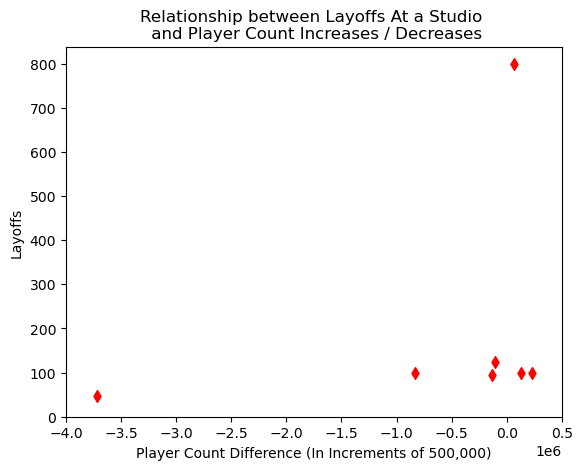

In [35]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = player_count,
            y = studio_layoffs,
            color = 'red',
            marker = 'd')

ax1.set_title('Relationship between Layoffs At a Studio \n and Player Count Increases / Decreases')
ax1.set_xlabel('Player Count Difference (In Increments of 500,000)')
ax1.set_ylabel('Layoffs')

plt.yticks(np.arange(0, 900, 100))
plt.xticks(np.arange(-4000000, 1000000, 500000))
plt.show()

## Scatter Plot
The scatter plot shows me that the player a decrease in player count is not entirely related to layoffs. As you can see on the plot, there are three studios that had an increase in players and four studios that had a decrease in players. If 3/7 of the studios that suffered layoffs (including the studio that had the greatest amount of layoffs at 800 employees let go) saw an increase in players over the alloted time frame then I can surmise that player decreases are not the direct cause of these layoffs.

In [33]:
stats.ttest_ind(player_count, studio_layoffs)

TtestResult(statistic=-1.1719103772404973, pvalue=0.26397510716973605, df=12.0)

# Conclusions
## Scatter Plot
From the scatter plot I found that the number of layoffs and the difference in players since 2021 do not entirely correlate. The studio that lost the most players also suffered the least amount of layoffs while the studio that suffered the most amount of layoffs actually gained players. This tells me that the layoffs at these studios are not directly tied to increases or decreses in the playerbase of their flagship title.
## T-Test
The t-test confirms what I concluded from the scatter plot. The p-value displayed by the t-test was about 0.26, which is far greater than 0.05. This all but confirms that the there is little to no significant statistical correlation between the layoffs at these studios and the difference in their player counts since 2021.
## Final Conclusion
From the data I collected I can determine that the increased amount of layoffs in the video game industry is not directly related to a decrease in players. 

# Reflection
## Limitations
Going into this project I already had very limited data. Video games developers keep most of their information close to the chest, so finding reliable and in depth data is difficult. There are other factors I would have liked to look at in tandem with layoffs other than player count, such as sales and production costs, but this information is not available to the public. The data I did have to work with, player counts, are mostly from a reliable source, Steam. Steam is the platform through which a large majority of people play PC games, and I collected most of the player count data from Steam. However, that data only considers players on PC. Although the amount of players on PC is significant and is often indicative of console player counts, those exact console player counts are not available to me. Therefore I was limited to only the data available on PC players which in turn only gives a look at part of the bigger picture.
## Alternative Approaches
Alternatively I would have liked to look at how increasing production costs of triple A video games are related to layoffs in the video game industry, but as stated before that information is not publicly available. I would have liked to see if increased production costs have set a higher bar for success in the industry. As production costs rise, games must be greater and greater successes to match those rising costs, so games that may have been considered a success three or four years ago are not meeting the current standard for what constitutes a success. I would have also wanted to look at the sales for these studios in the past to determine what used to be considered a success and in the present to see what is considered a success currently. This would have been the alaternative approach I took if I had access to the information required.
## Next Steps
If I were to continue working on this project, I would try to obtain the player count for consoles to determine if that data would lead to a different result. Although I believe that this would not have much impact on my results, it's impossible to know for sure without putting it to the test. I would also like to look at a greater number of studios, but again I am faced with limitations in data collection. Not all studios that publish their games on PC are publish through Steam, so their player counts are not available. To determine this information I would need to obtain insider information which is beyond the scope of what I can do. In order to pursue this line of questioning even further, I would need access to resources that are not publicly available. This may be possible to eventually find, but it would require connections in the industry that I do not have. 